In [1]:
import numpy as np
import matplotlib.pyplot as plt

def grad(F):  ## vectorfield from scalarfield
    return np.array([np.gradient(F, axis=i-1) for i in range(len(F.shape))])

def div(V):  ## scalarfield of vectorfield
    div_per_dimension = np.array([grad(V[i])[i] for i in range(len(V))])
    return np.ufunc.reduce(np.add, div_per_dimension)

c = [100,100]; ε = 100  ## location and size of center
Φ = np.fromfunction(lambda x, y: 1/np.sqrt(ε+(x-c[0])**2+(y-c[1])**2), [200,200])  ## GravitationField
g0 = grad(Φ)

#plt.imshow(Φ, cmap=plt.colormaps.get_cmap('YlGnBu_r')); plt.colorbar()
#plt.quiver(g0[0], -g0[1], color="yellow", pivot='tip')
#plt.show()

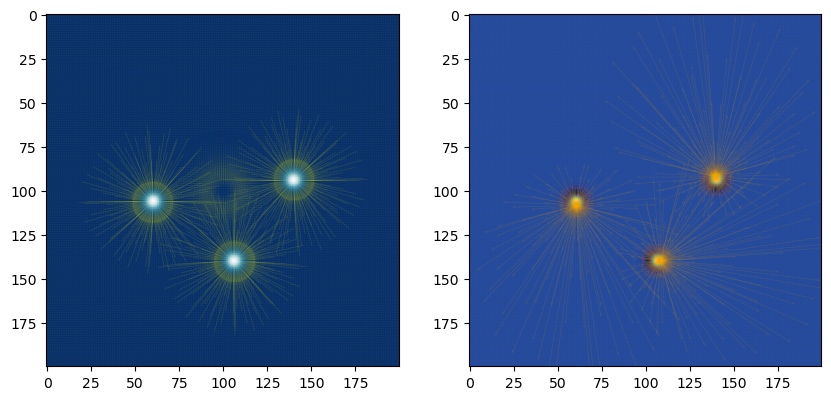

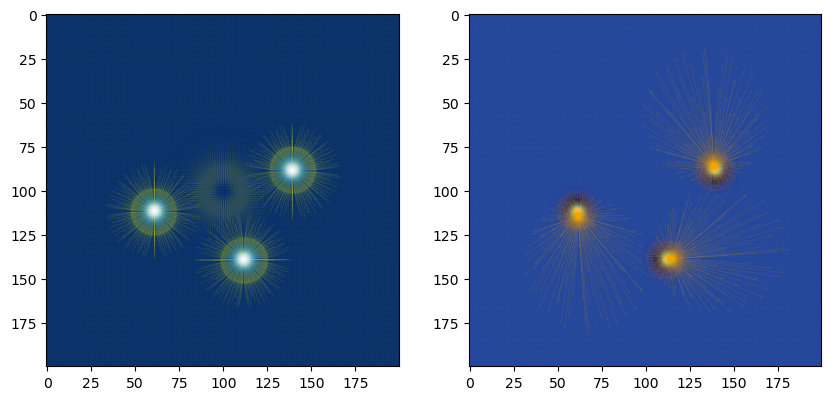

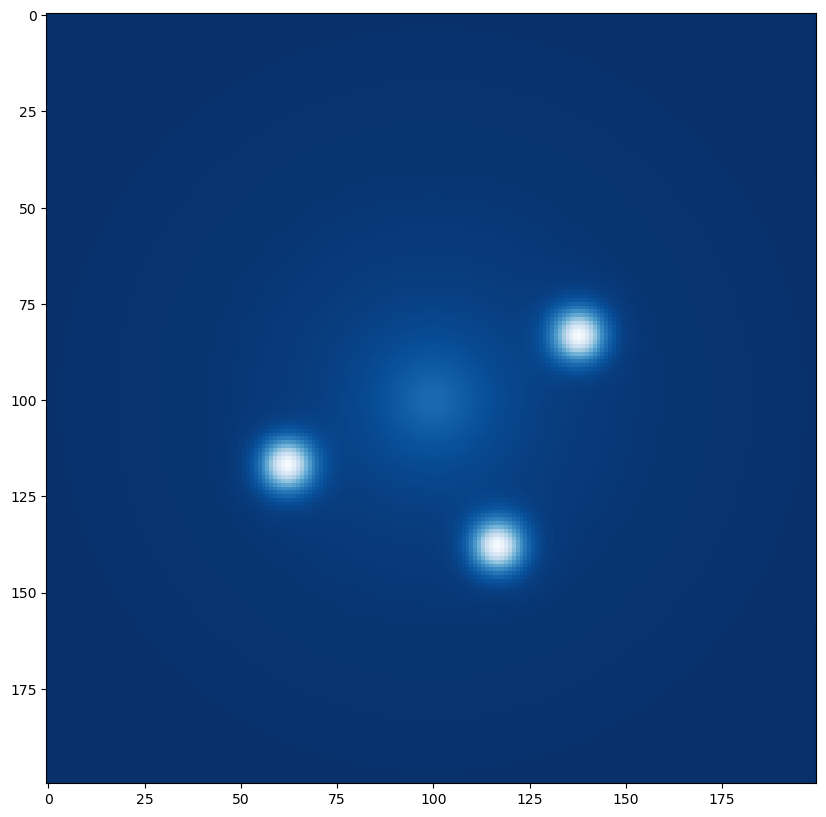

Step=300, ||M||sum=3.0000, Mmax=0.0081, Mmin=0.0000, ||P||sum=0.3346, Pmax=0.0007, Pmin=-0.0007


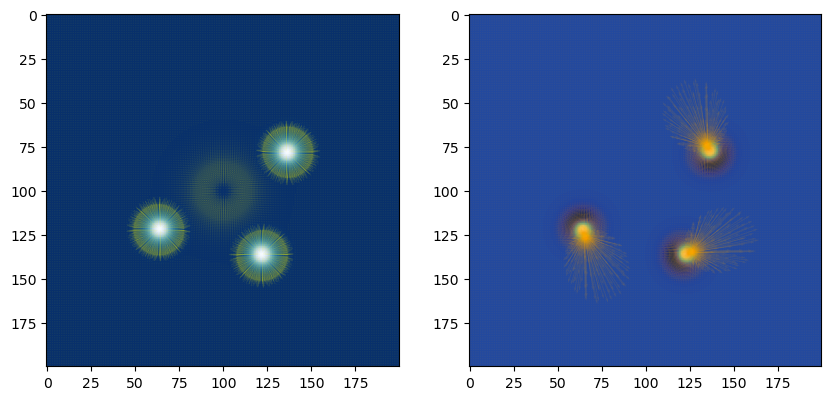

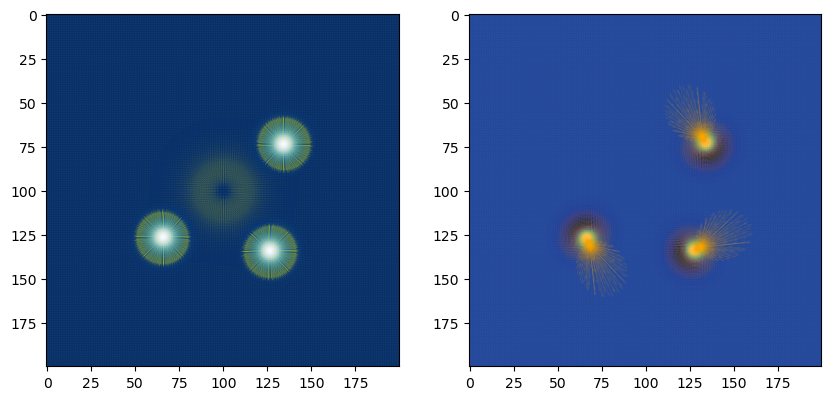

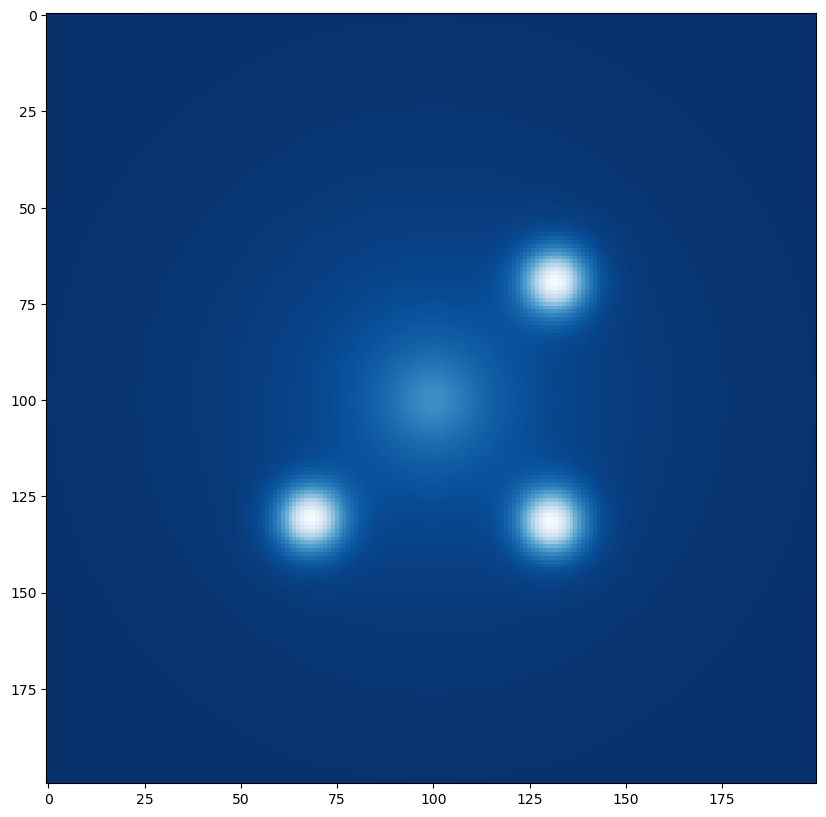

Step=600, ||M||sum=3.0000, Mmax=0.0048, Mmin=0.0000, ||P||sum=0.2715, Pmax=0.0003, Pmin=-0.0003


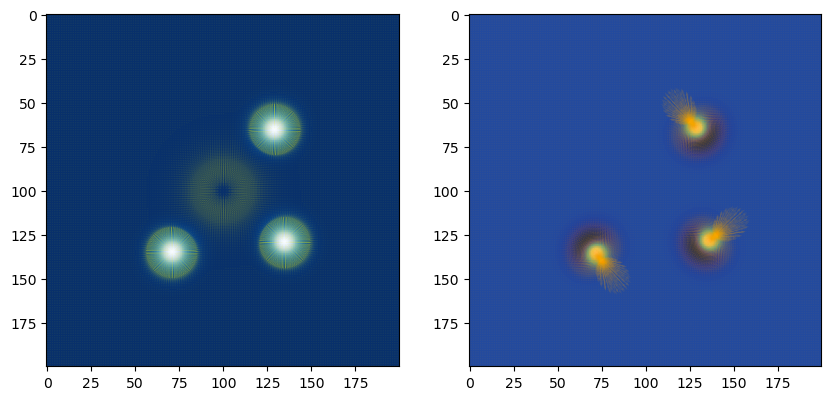

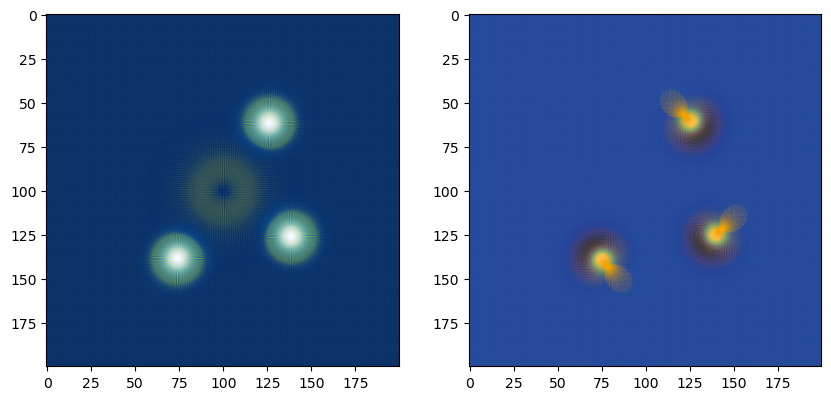

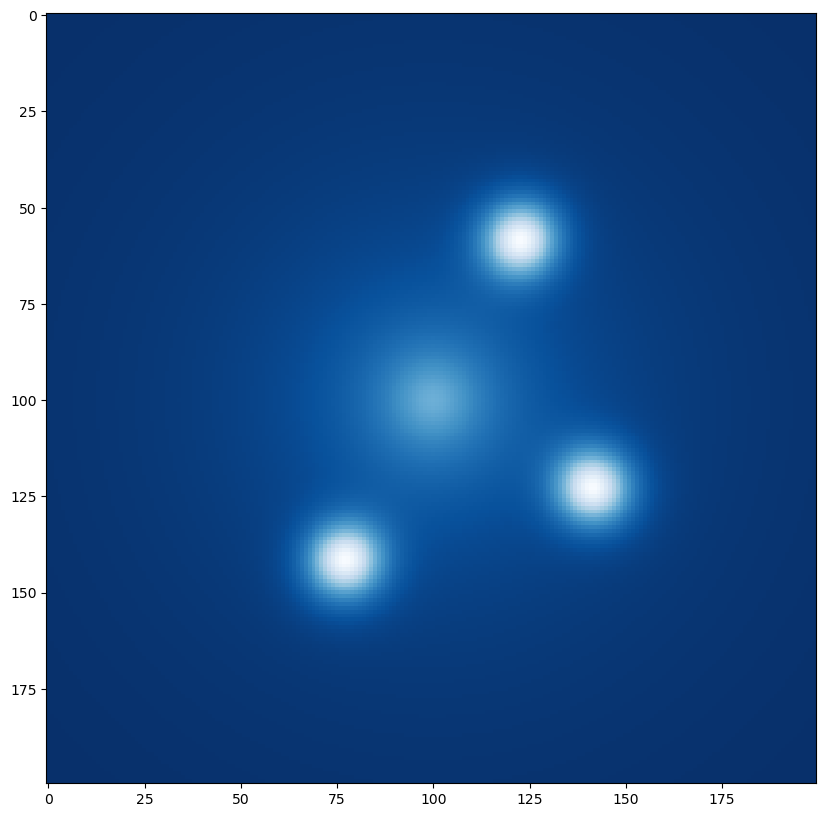

Step=900, ||M||sum=3.0000, Mmax=0.0034, Mmin=0.0000, ||P||sum=0.2368, Pmax=0.0002, Pmin=-0.0002


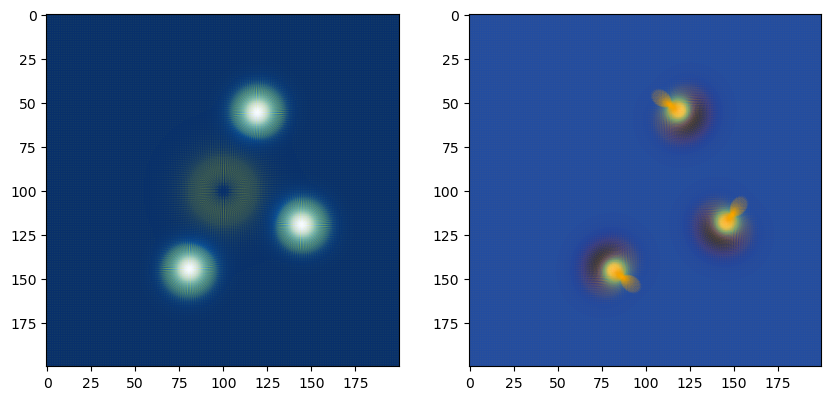

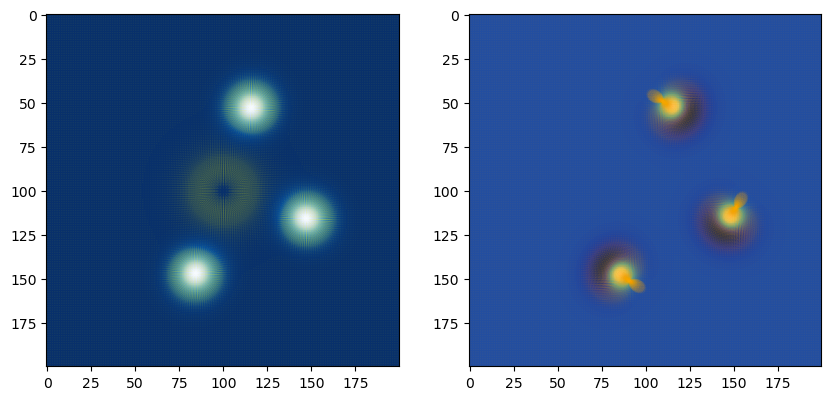

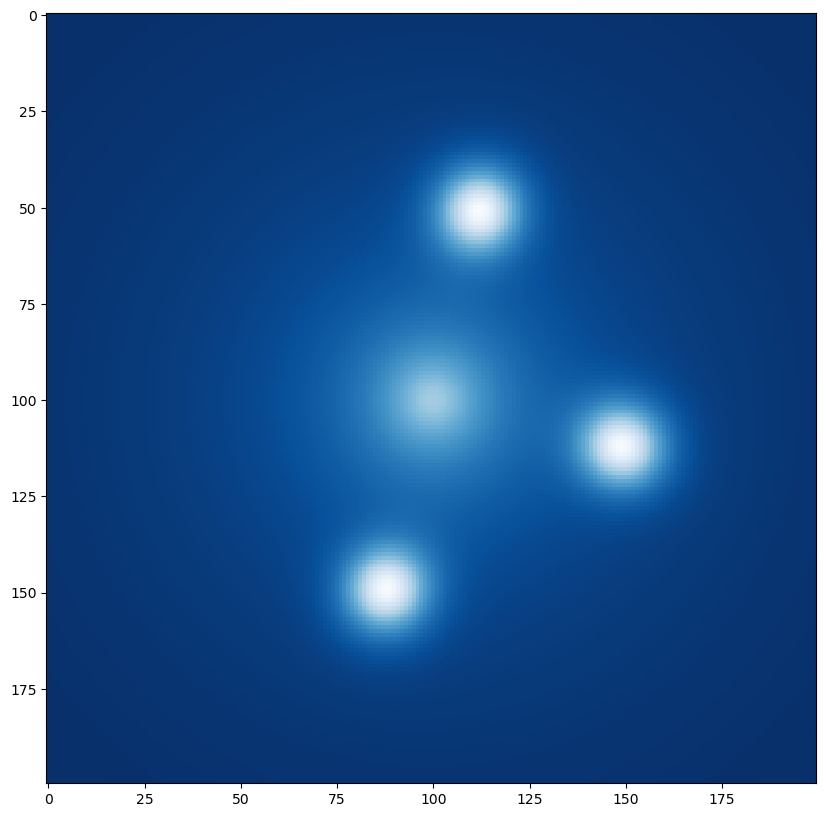

Step=1200, ||M||sum=3.0000, Mmax=0.0027, Mmin=0.0000, ||P||sum=0.2116, Pmax=0.0001, Pmin=-0.0001


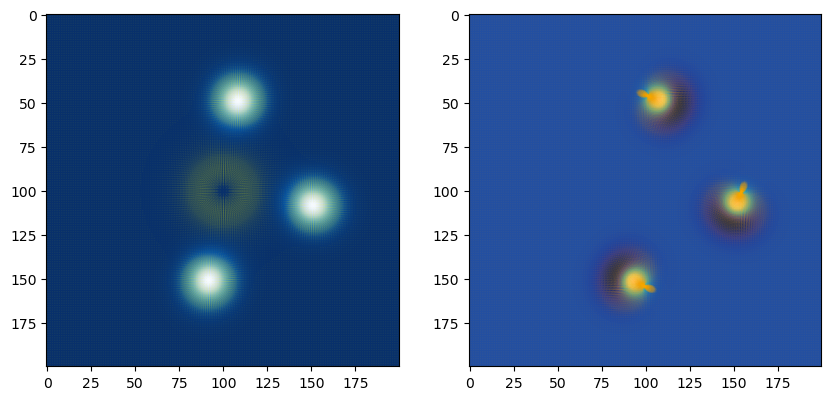

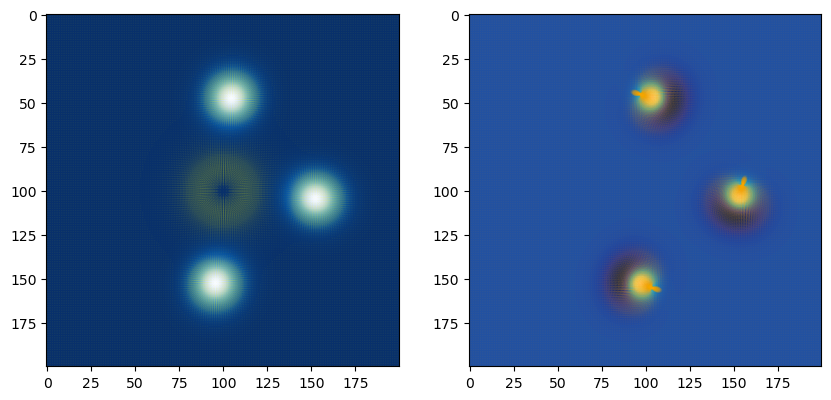

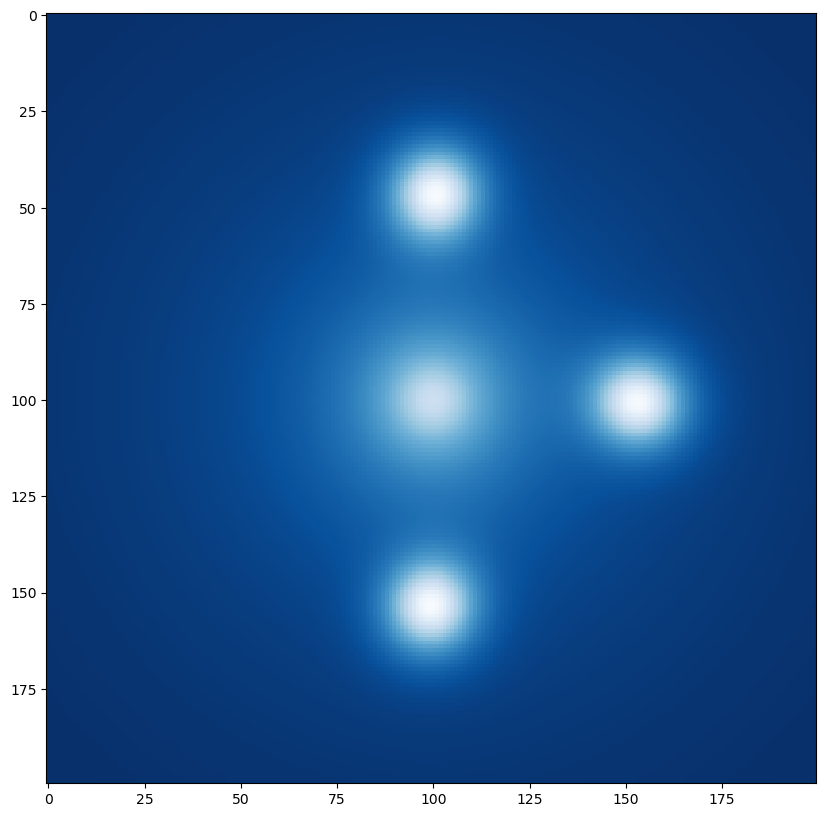

Step=1500, ||M||sum=3.0000, Mmax=0.0021, Mmin=0.0000, ||P||sum=0.1913, Pmax=0.0001, Pmin=-0.0001


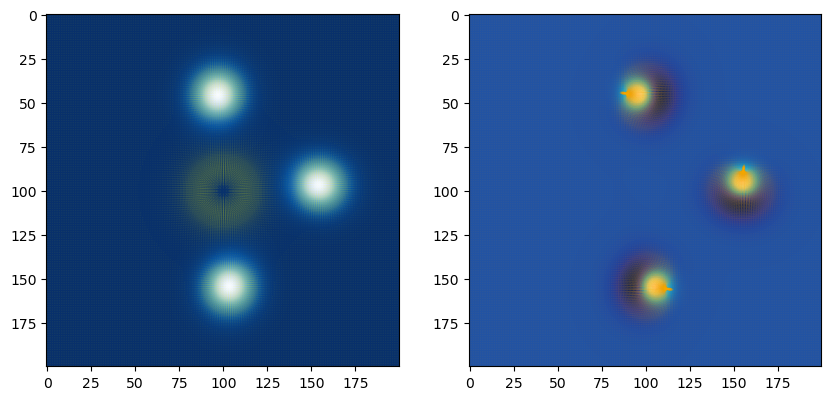

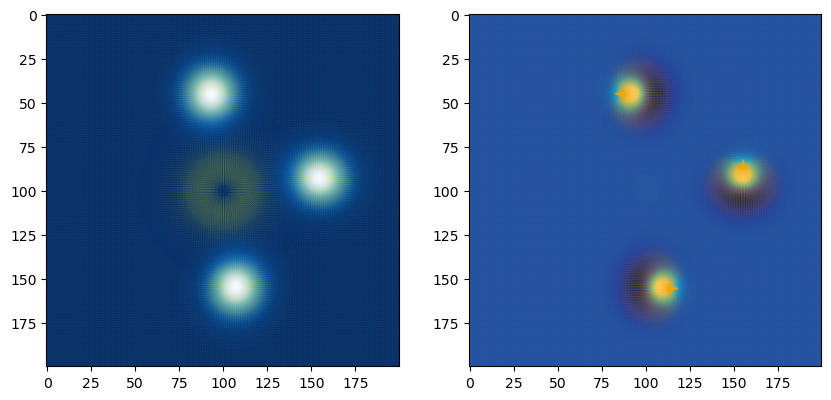

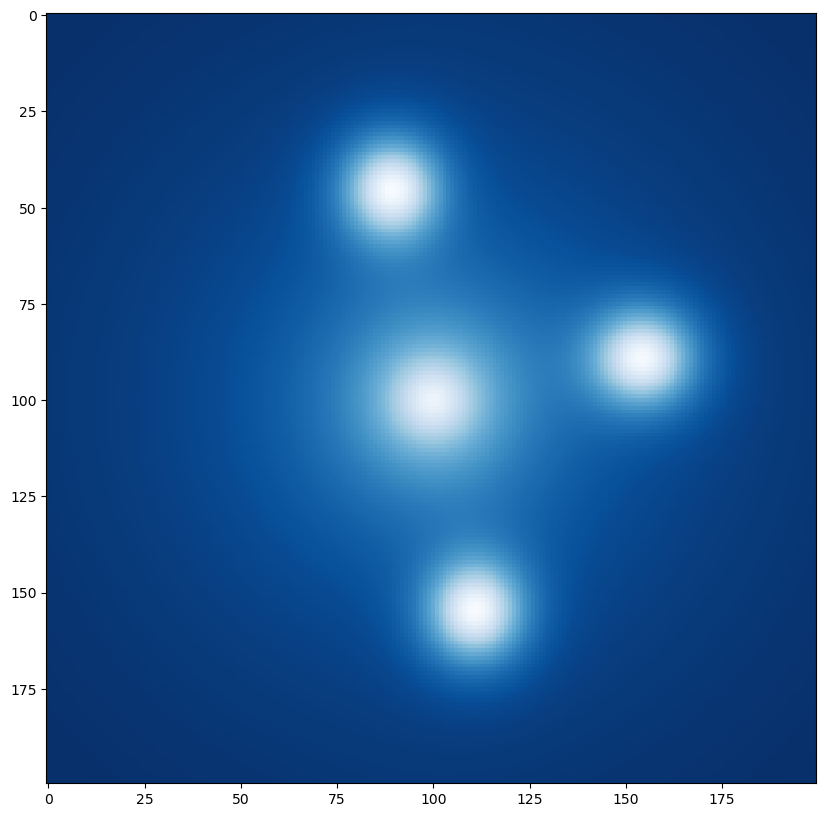

Step=1800, ||M||sum=3.0000, Mmax=0.0018, Mmin=0.0000, ||P||sum=0.1748, Pmax=0.0001, Pmin=-0.0001


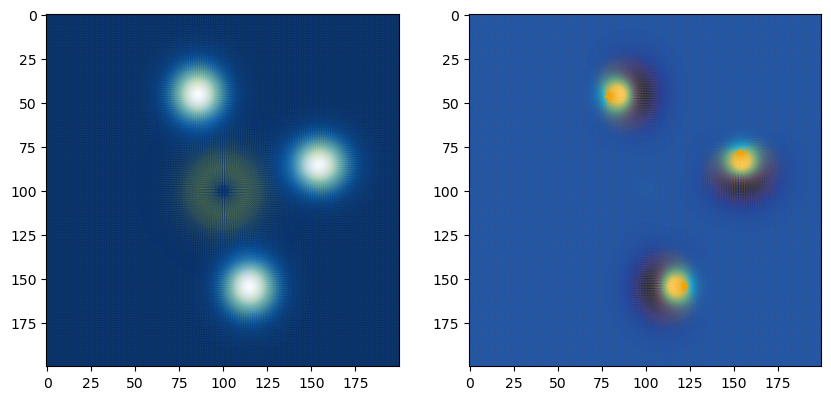

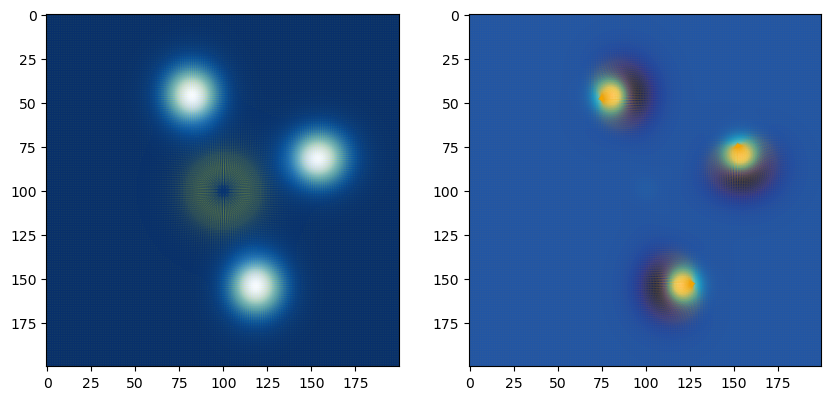

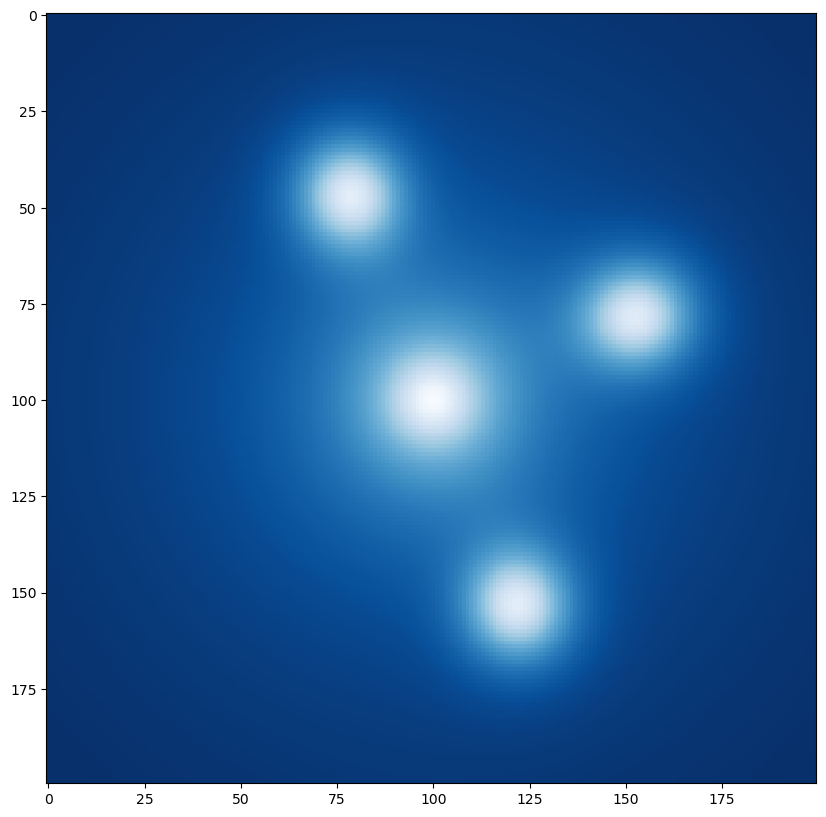

Step=2100, ||M||sum=3.0000, Mmax=0.0015, Mmin=0.0000, ||P||sum=0.1625, Pmax=0.0001, Pmin=-0.0001


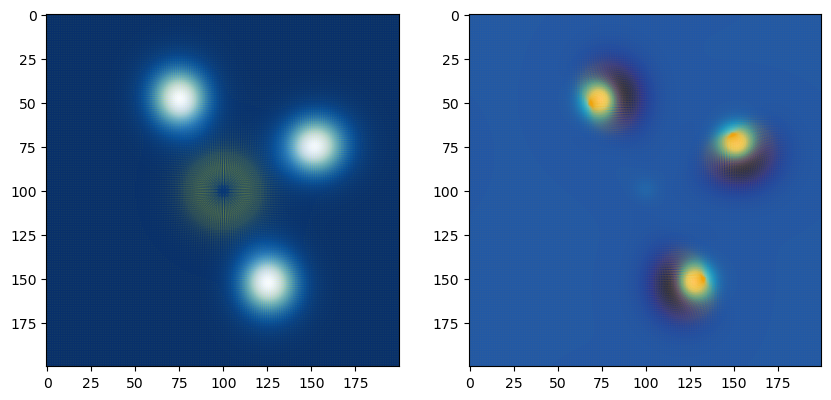

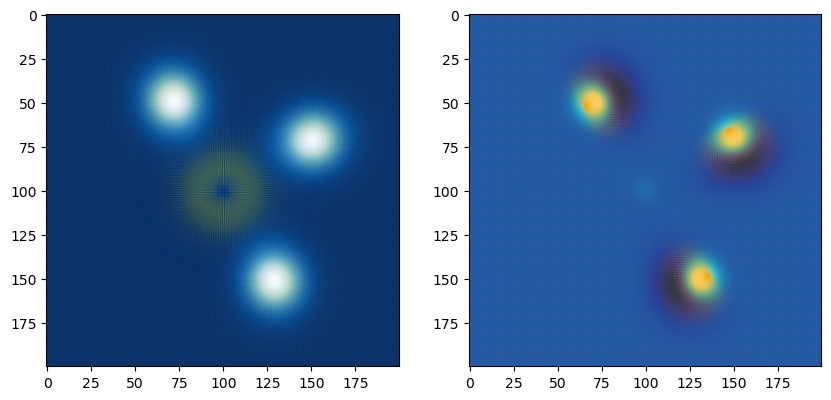

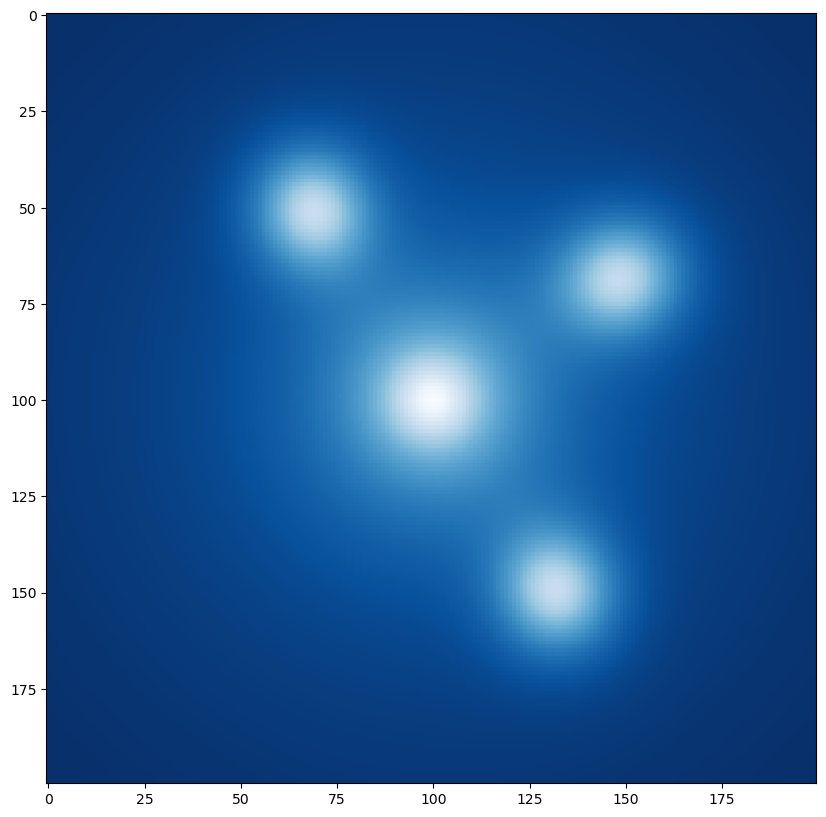

Step=2400, ||M||sum=3.0000, Mmax=0.0013, Mmin=0.0000, ||P||sum=0.1561, Pmax=0.0001, Pmin=-0.0001


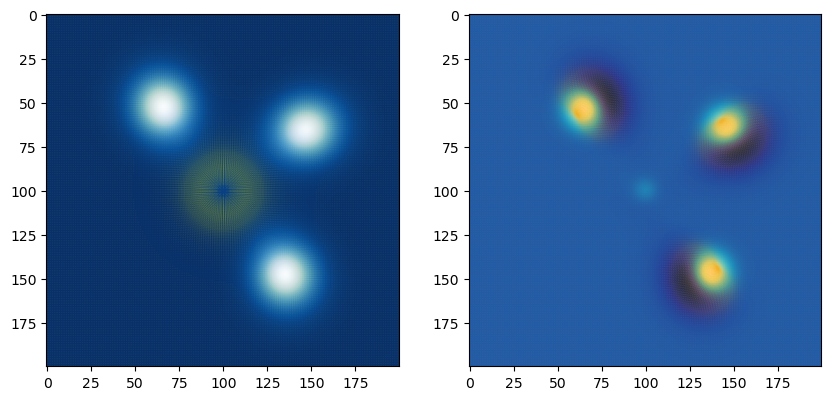

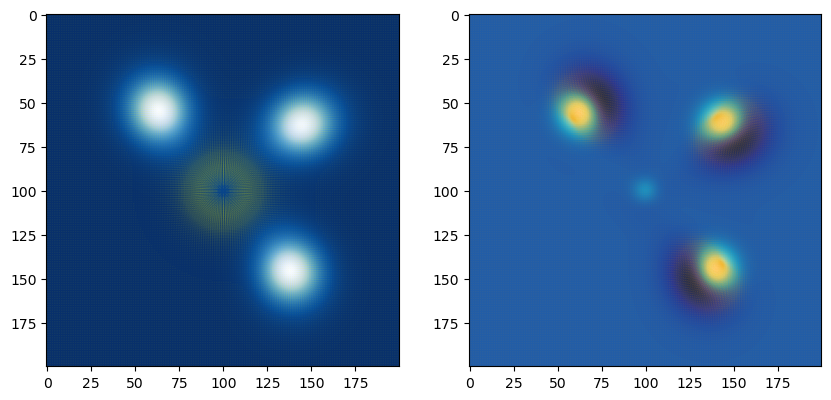

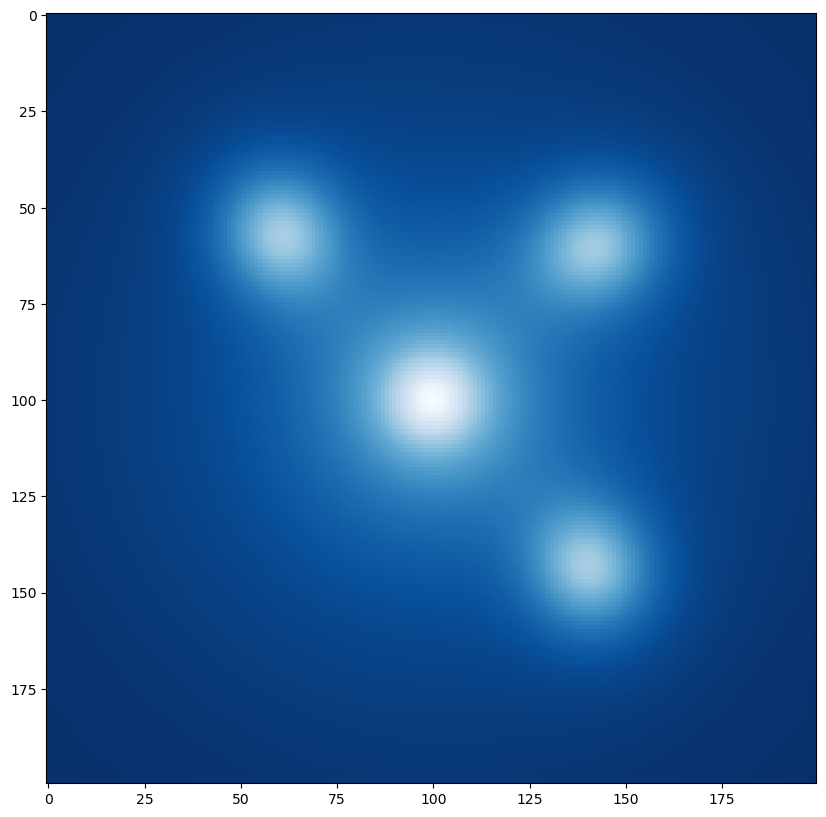

Step=2700, ||M||sum=3.0000, Mmax=0.0011, Mmin=0.0000, ||P||sum=0.1544, Pmax=0.0000, Pmin=-0.0000


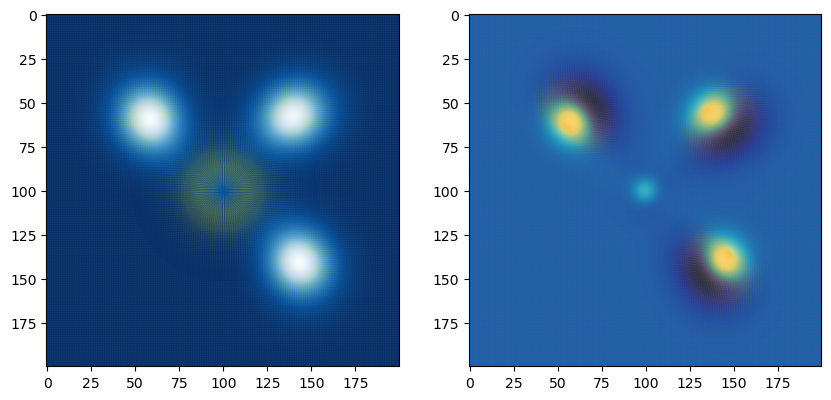

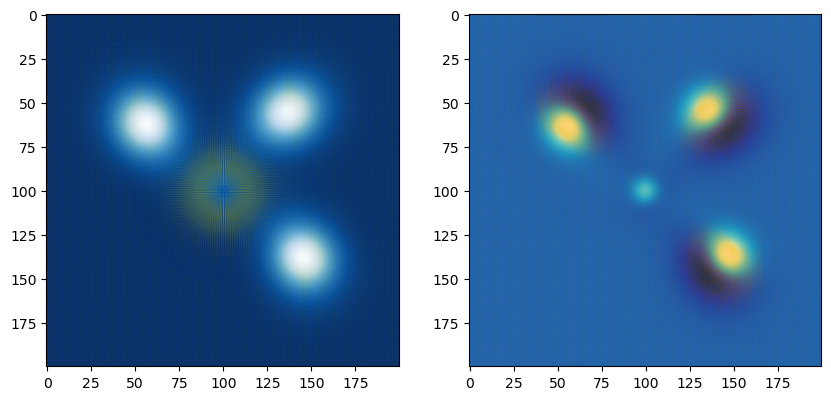

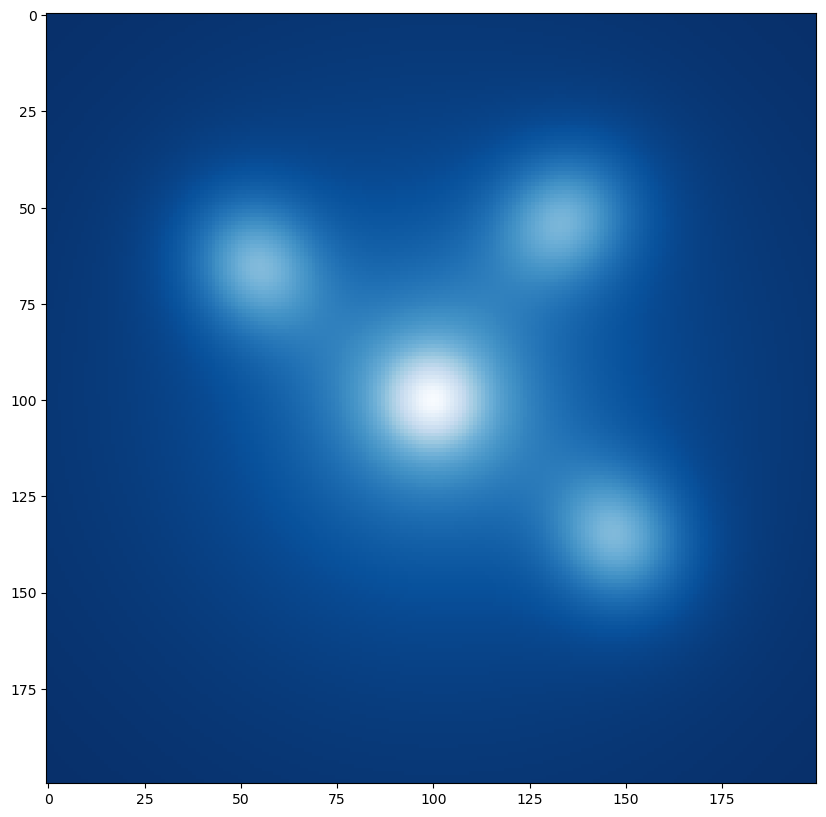

Step=3000, ||M||sum=3.0000, Mmax=0.0009, Mmin=0.0000, ||P||sum=0.1539, Pmax=0.0000, Pmin=-0.0000


In [2]:
from functions import convolve2d
K_withAntimatter = np.array([[-1],[0],[1]])/2
K = K_withAntimatter

def plot(M, P, g, s):
    V = np.divide(P, np.abs(M), where=M!=0, out=np.zeros_like(P))
    fig, [ax0, ax1] = plt.subplots(1,2, figsize=(10,10))
    ax0.imshow(M, cmap=plt.colormaps.get_cmap('Blues_r'))
    ax0.quiver(g[0], -g[1], color="yellow", pivot='tip', alpha=0.1)
    ax1.imshow(div(P), cmap=plt.colormaps.get_cmap('YlGnBu'))
    ax1.quiver(P[0], -P[1], color="orange", alpha=0.1)
    #ax2.imshow(div(V), cmap=plt.colormaps.get_cmap('ocean'))
    #ax2.quiver(V[0], -V[1], color="red")
    #ax1.set_aspect('equal', 'box'); ax2.set_aspect('equal', 'box')
    plt.show()

def plot_details(M, P, g, s):
    V = np.divide(P, np.abs(M), where=M!=0, out=np.zeros_like(P))
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(500*M + Φ/np.max(Φ), cmap=plt.colormaps.get_cmap('Blues_r'))
    #ax.imshow(div(g), cmap=plt.colormaps.get_cmap('Blues'))
    #ax.imshow(M, cmap=plt.colormaps.get_cmap('Blues_r'))
    #ax.imshow(div(P), cmap=plt.colormaps.get_cmap('ocean'))
    #ax.quiver(g[0], -g[1], color="yellow", pivot='tip', alpha=0.2)
    #ax.quiver(V[0], -V[1], color="grey", alpha=0.1)
    #ax.quiver(P[0]/100, -P[1]/100, color="orange", alpha=0.2)
    plt.show()
    print("Step={:d}, ||M||sum={:.4f}, Mmax={:.4f}, Mmin={:.4f}, ||P||sum={:.4f}, Pmax={:.4f}, Pmin={:.4f}".format(s, np.sum(M), np.max(M), np.min(M), np.sum(np.abs(P)), np.max(P), np.min(P)))

def clipVlight(V, max=1):
    return np.tanh(V/max)*max

Kavg = np.array([[0.1, 0.1, 0.1],
                 [0.1, 0.2, 0.1],
                 [0.1, 0.1, 0.1]])
def move(X, V, Kavg=Kavg):
    X0 = convolve2d(X*V[0], K.T, mode="same", boundary="wrap")
    X1 = convolve2d(X*V[1], K, mode="same", boundary="wrap")
    return convolve2d(X+X0+X1, Kavg, mode="same", boundary="wrap")

def step(M, P, dt=1):
    M = np.clip(M, -1e127, 1e127)
    P = np.clip(P, -1e127, 1e127)
    
    g = 1.8*grad(np.abs(M)) + 0.095*g0
    V = clipVlight(np.divide(P, M, where=M!=0, out=np.zeros_like(P)))

    M = move(M, V)
    P = np.array([move(P[0],V), move(P[1],V)]) + M*g*dt
    
    return M, P, g

#M = 0.0001*(np.random.rand(*Φ.shape)-0.5)
M = np.zeros_like(Φ)
#P = 0.0001*np.random.rand(*([2]+list(Φ.shape)))
P = np.zeros([2]+list(Φ.shape))
M[100,60]=1; P[0][100,60]=0; P[1][100,60]=0.1
M[100,140]=1; P[0][100,140]=0; P[1][100,140]=-0.1
M[140,100]=1; P[0][140,100]=0.1; P[1][140,100]=0

for s in range(1,1+3000):
    M, P, g = step(M, P,)
    if s % 300 == 0:
        plot_details(M, P, g, s)
    elif s % 100 == 0:
        plot(M, P, g, s)